In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings('ignore')

## Read Data

In [2]:
data = pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
data.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
data.shape

(3586, 67)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum().sum()

118

In [9]:
data.drop(['Co_Code','Co_Name'],axis=1,inplace=True)

In [10]:
data.head()

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [11]:
data.shape

(3586, 65)

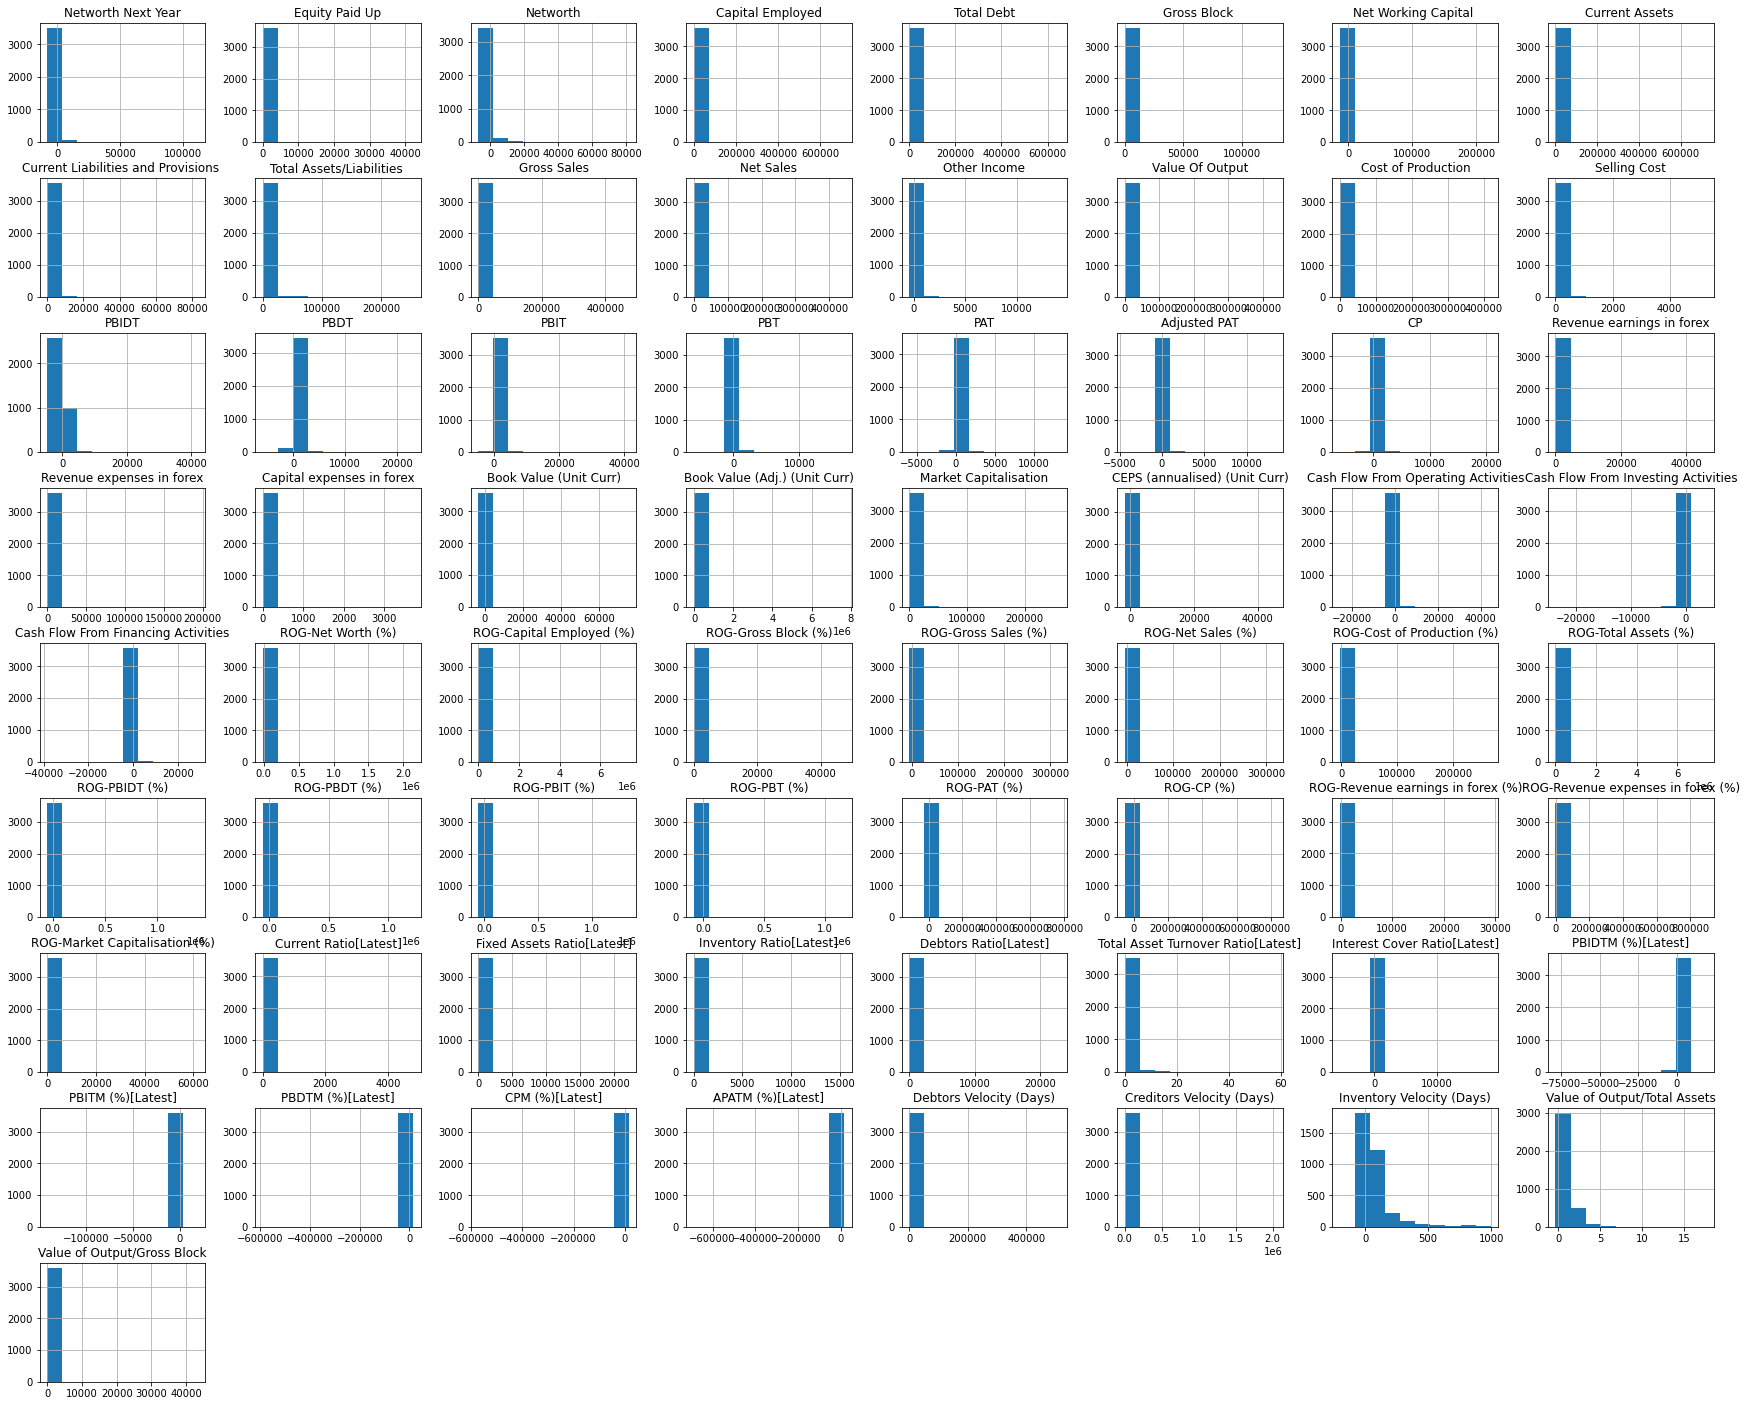

In [12]:
data.hist(figsize=(30,25));

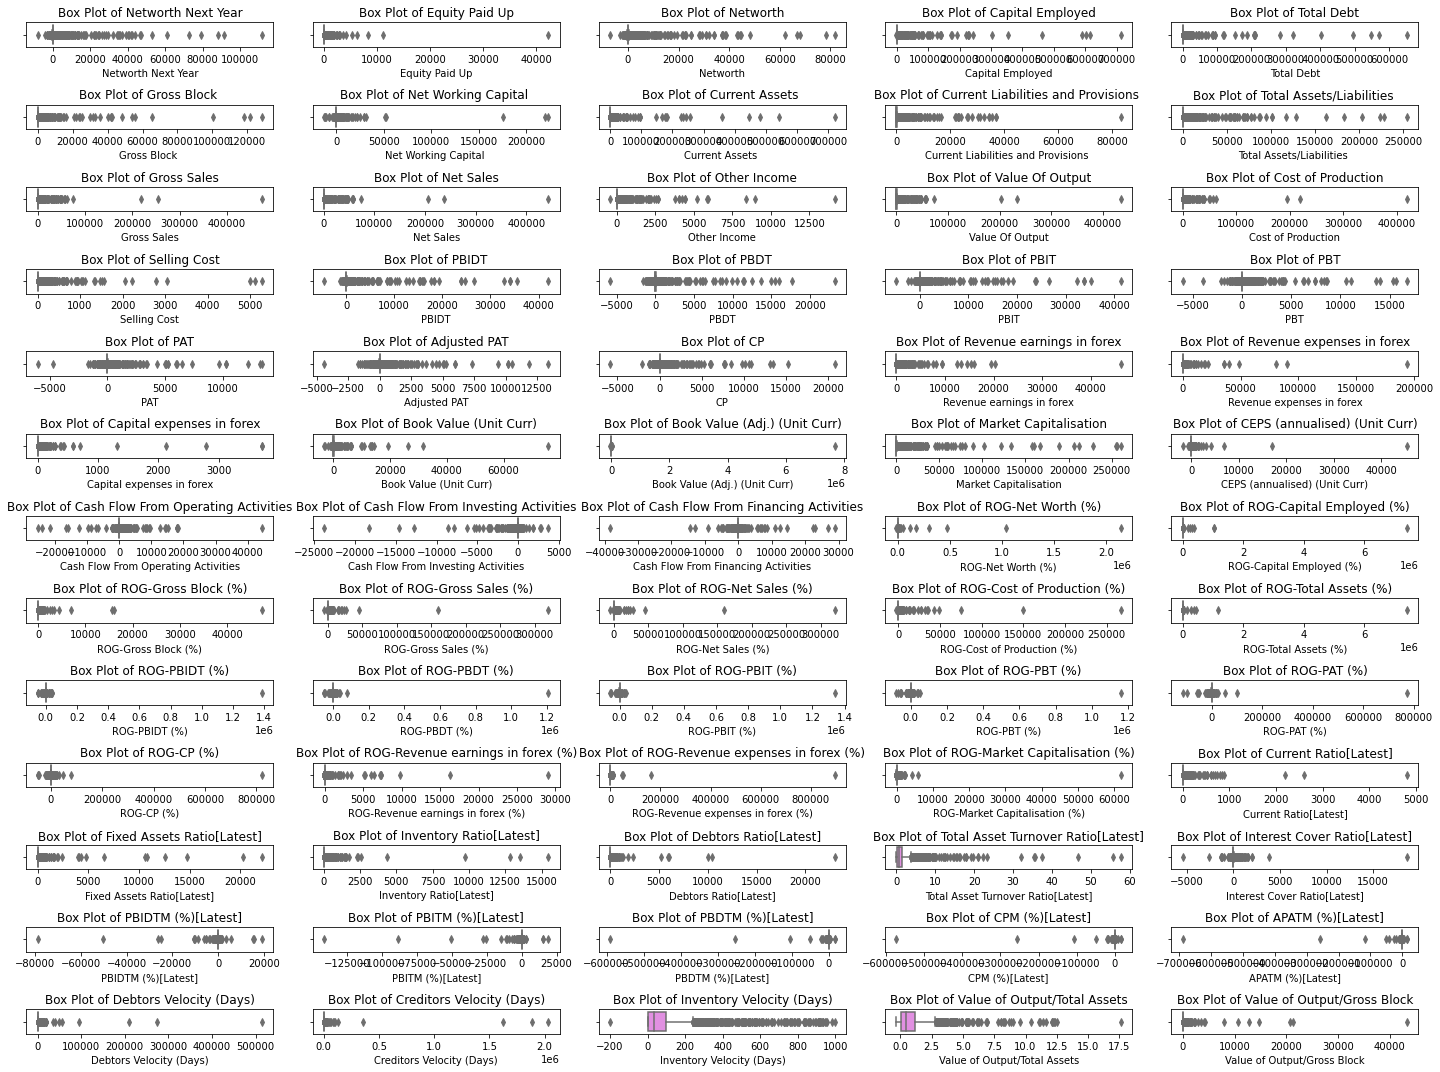

In [13]:
plt.figure(figsize = (20,15))
feature_list = data.describe().columns
for i in range(len(feature_list)):
    plt.subplot(13,5,i+1)
    sns.boxplot(x=data[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## 1.1 Outlier Treatment

In [14]:
# Remove outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
for column in data.columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

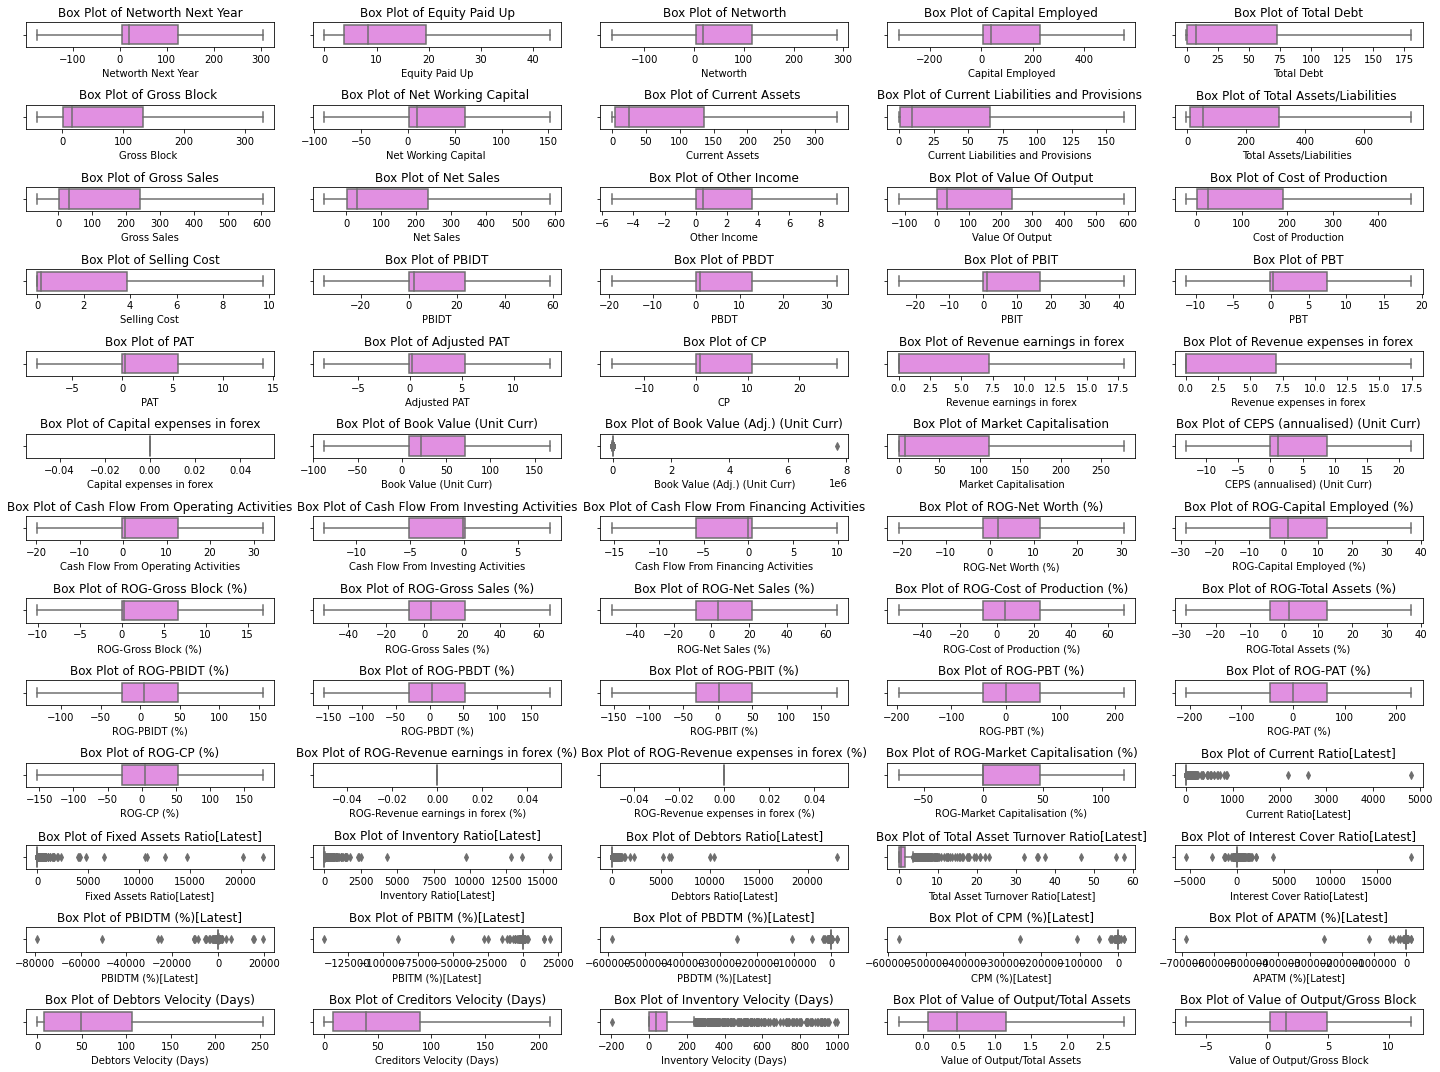

In [16]:
plt.figure(figsize = (20,15))
feature_list = data.describe().columns
for i in range(len(feature_list)):
    plt.subplot(13,5,i+1)
    sns.boxplot(x=data[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## 1.3 Transform Target variable into 0 and 1

In [17]:
print('Positive',data[data['Networth Next Year']>0].shape[0])
print('Negative',data[data['Networth Next Year']<=0].shape[0])

Positive 3198
Negative 388


In [18]:
data['Default'] = np.where(data['Networth Next Year']>0,0,1)

In [19]:
data['Default'].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [20]:
predictors = data.drop('Default', axis = 1)
response = data['Default']

## 1.2 Missing Value Treatment

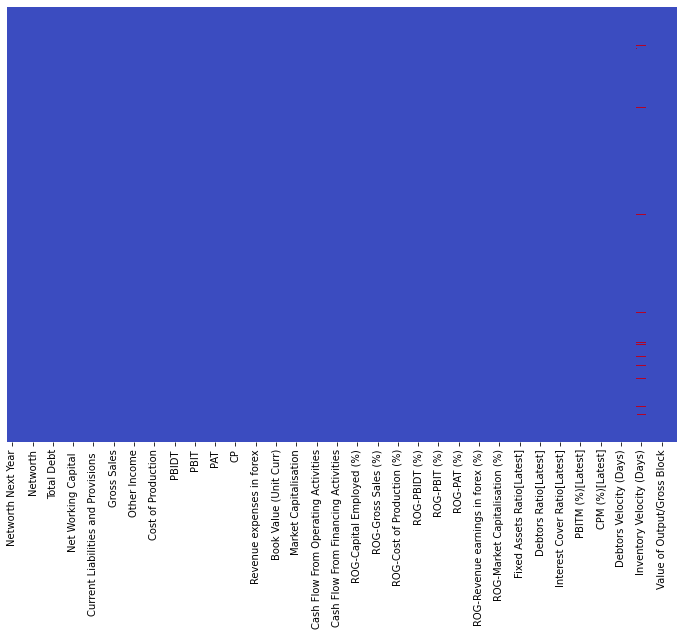

In [21]:
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [23]:
data1 = pd.concat([scaled_predictors, response], axis = 1)

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
data1_imputed = pd.DataFrame(imputer.fit_transform(data1), columns = data1.columns)

In [25]:
data1_imputed.isnull().sum().sum()

0

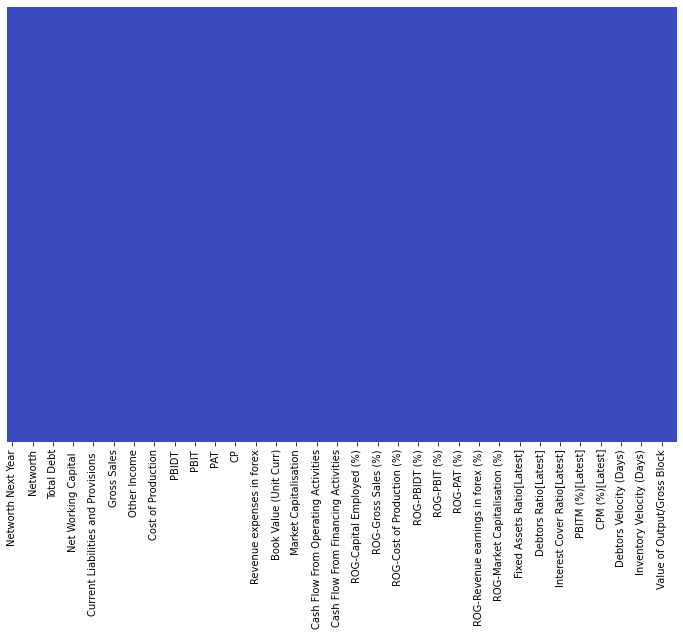

In [26]:
plt.figure(figsize = (12,8))
sns.heatmap(data1_imputed.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

## 1.4 Univariate & Bivariate analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

## Univariate Analysis

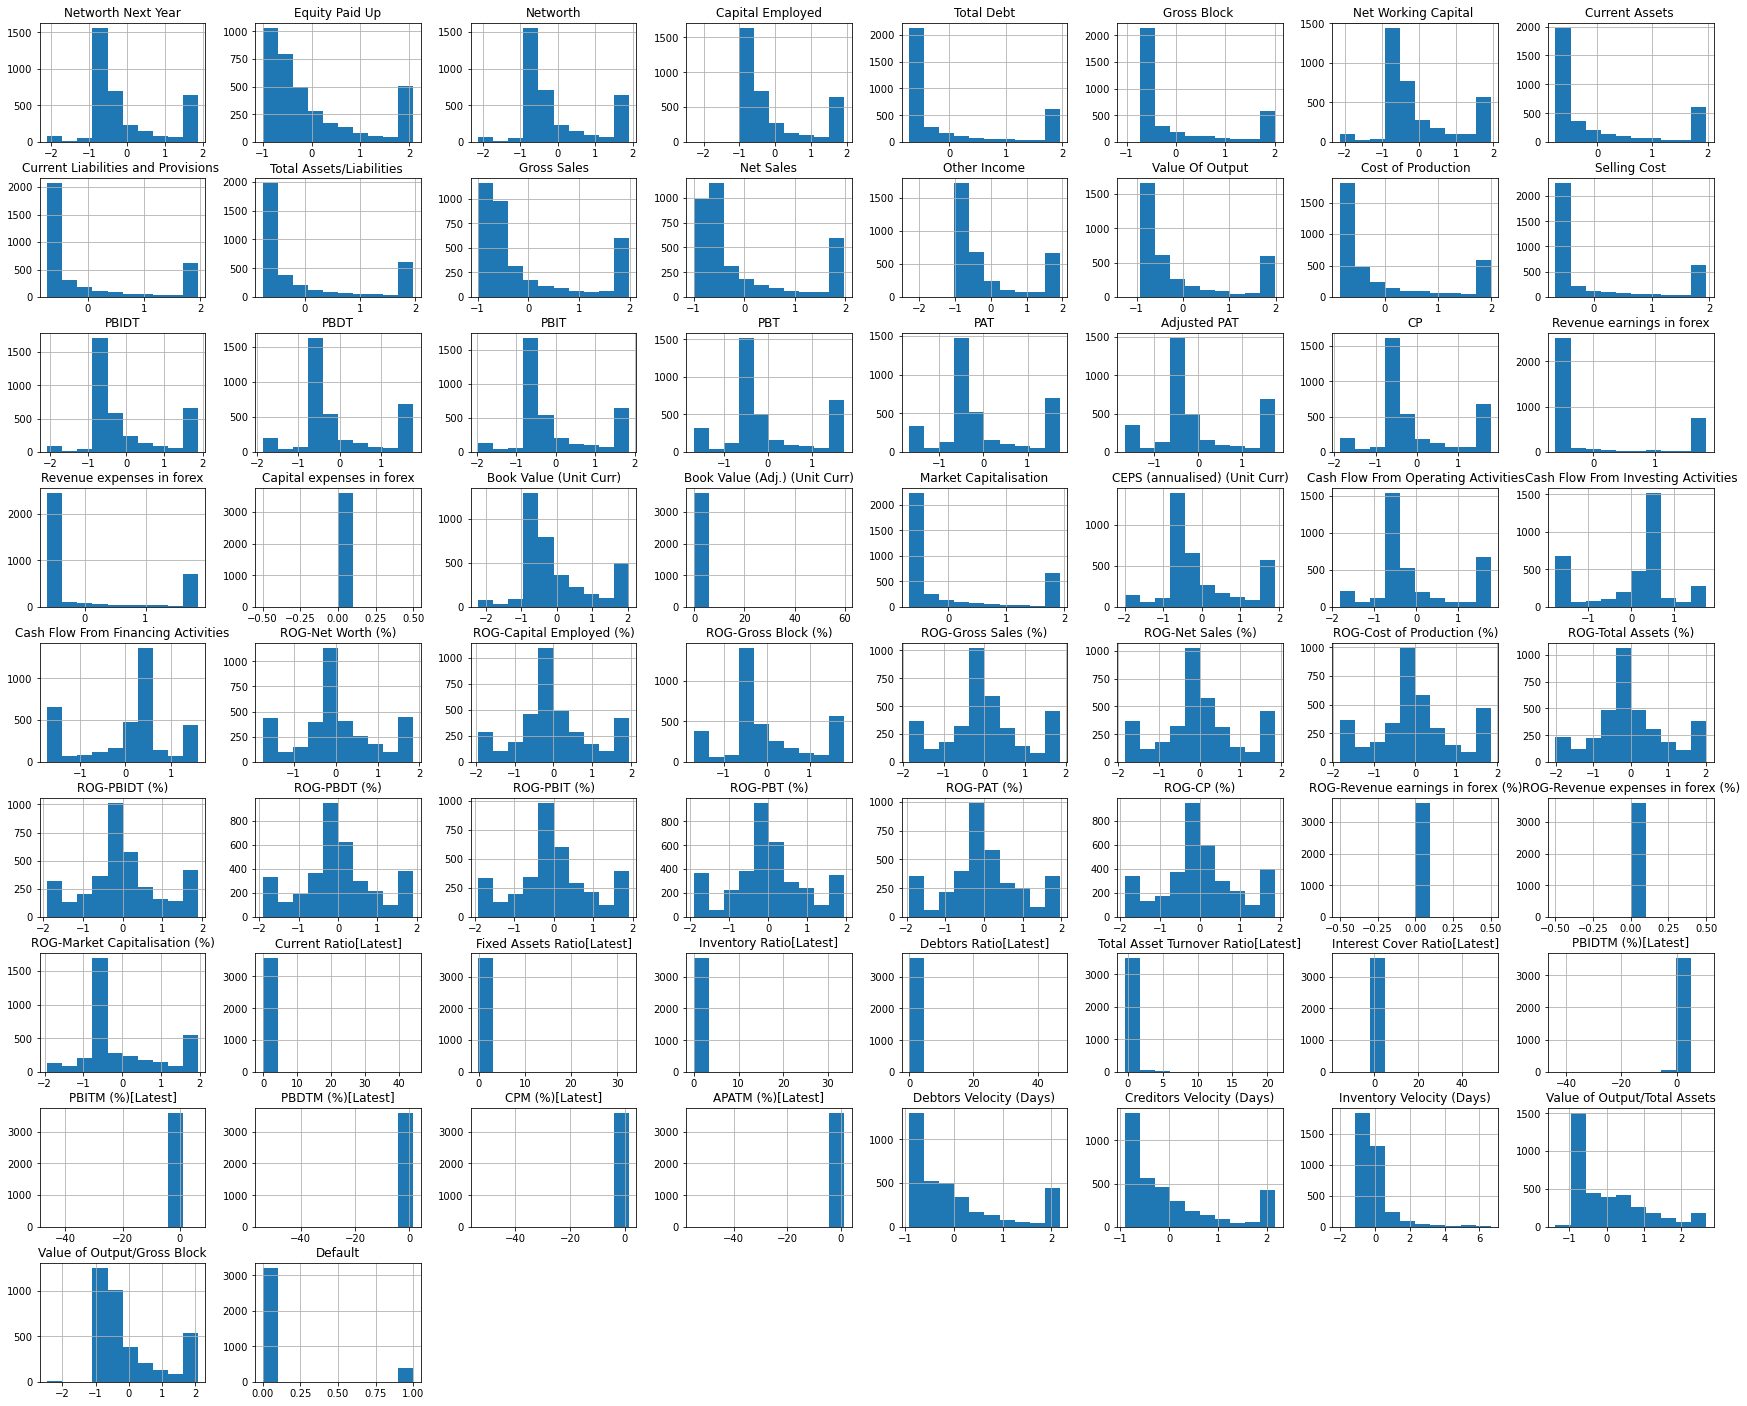

In [27]:
data1_imputed.hist(figsize=(30,25));

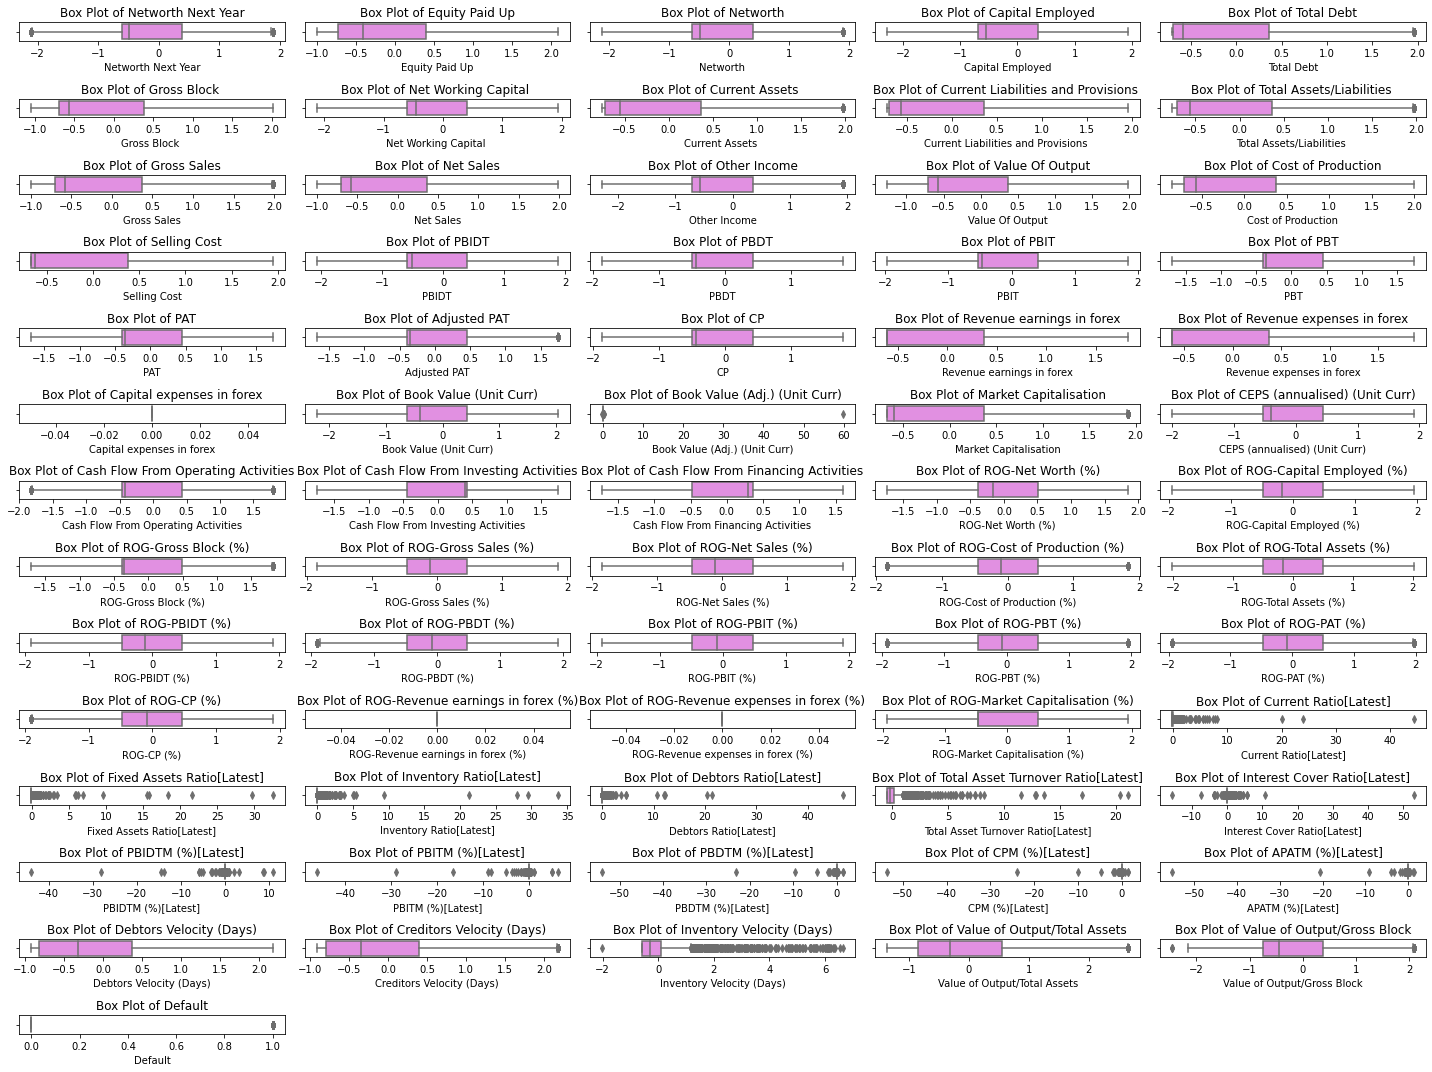

In [28]:
plt.figure(figsize = (20,15))
feature_list = data1_imputed.describe().columns
for i in range(len(feature_list)):
    plt.subplot(14,5,i+1)
    sns.boxplot(x=data1_imputed[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Bivariate Analysis

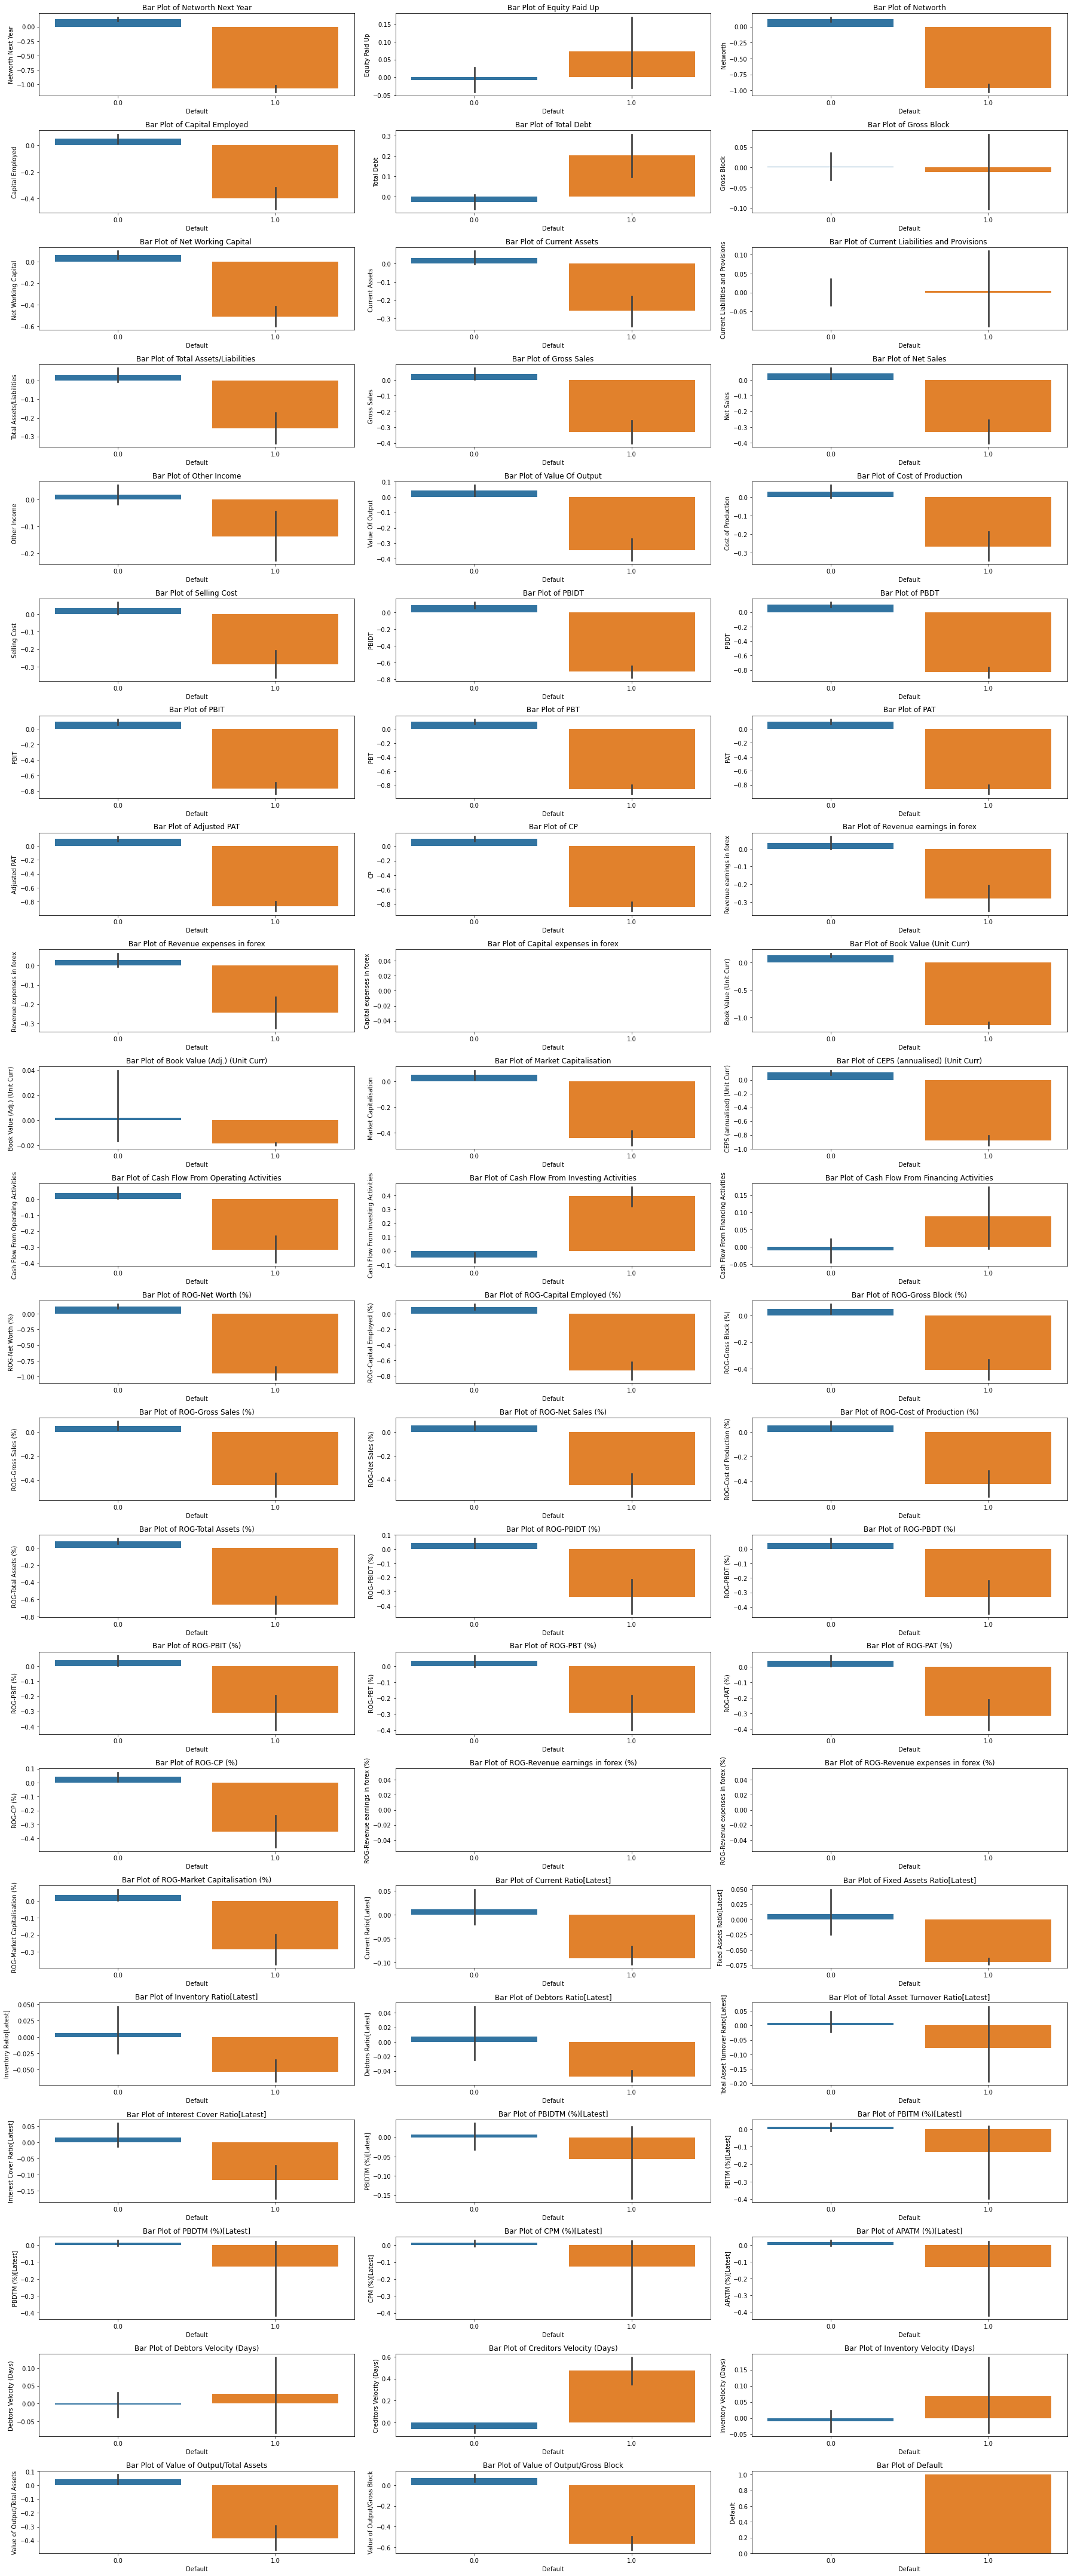

In [29]:
plt.figure(figsize = (25,60))
feature_list = data1_imputed.describe().columns
for i in range(len(feature_list)):
    plt.subplot(22,3,i+1)
    sns.barplot(x=data1_imputed['Default'],y=data1_imputed[feature_list[i]])
    plt.title('Bar Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Multivariate

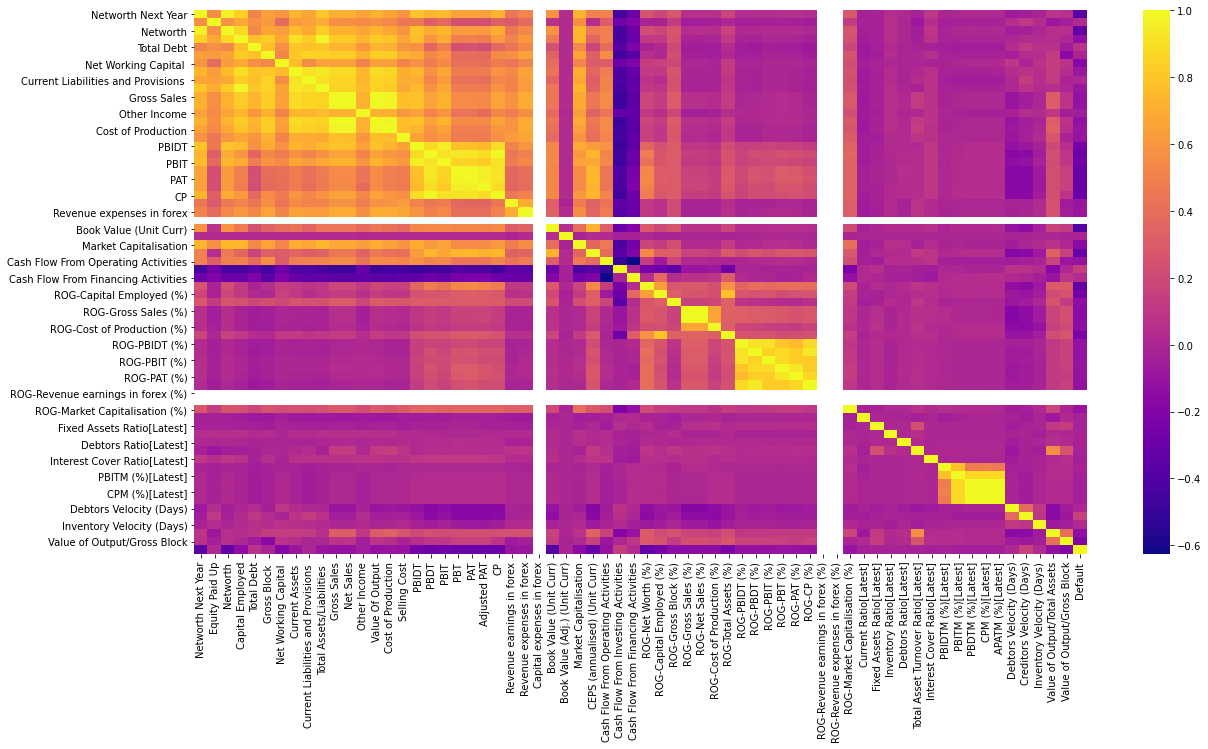

In [30]:
plt.figure(figsize = (20,10))
g = data1_imputed.corr()
sns.heatmap(g, cmap = 'plasma');

In [31]:
g = data1_imputed.corr()

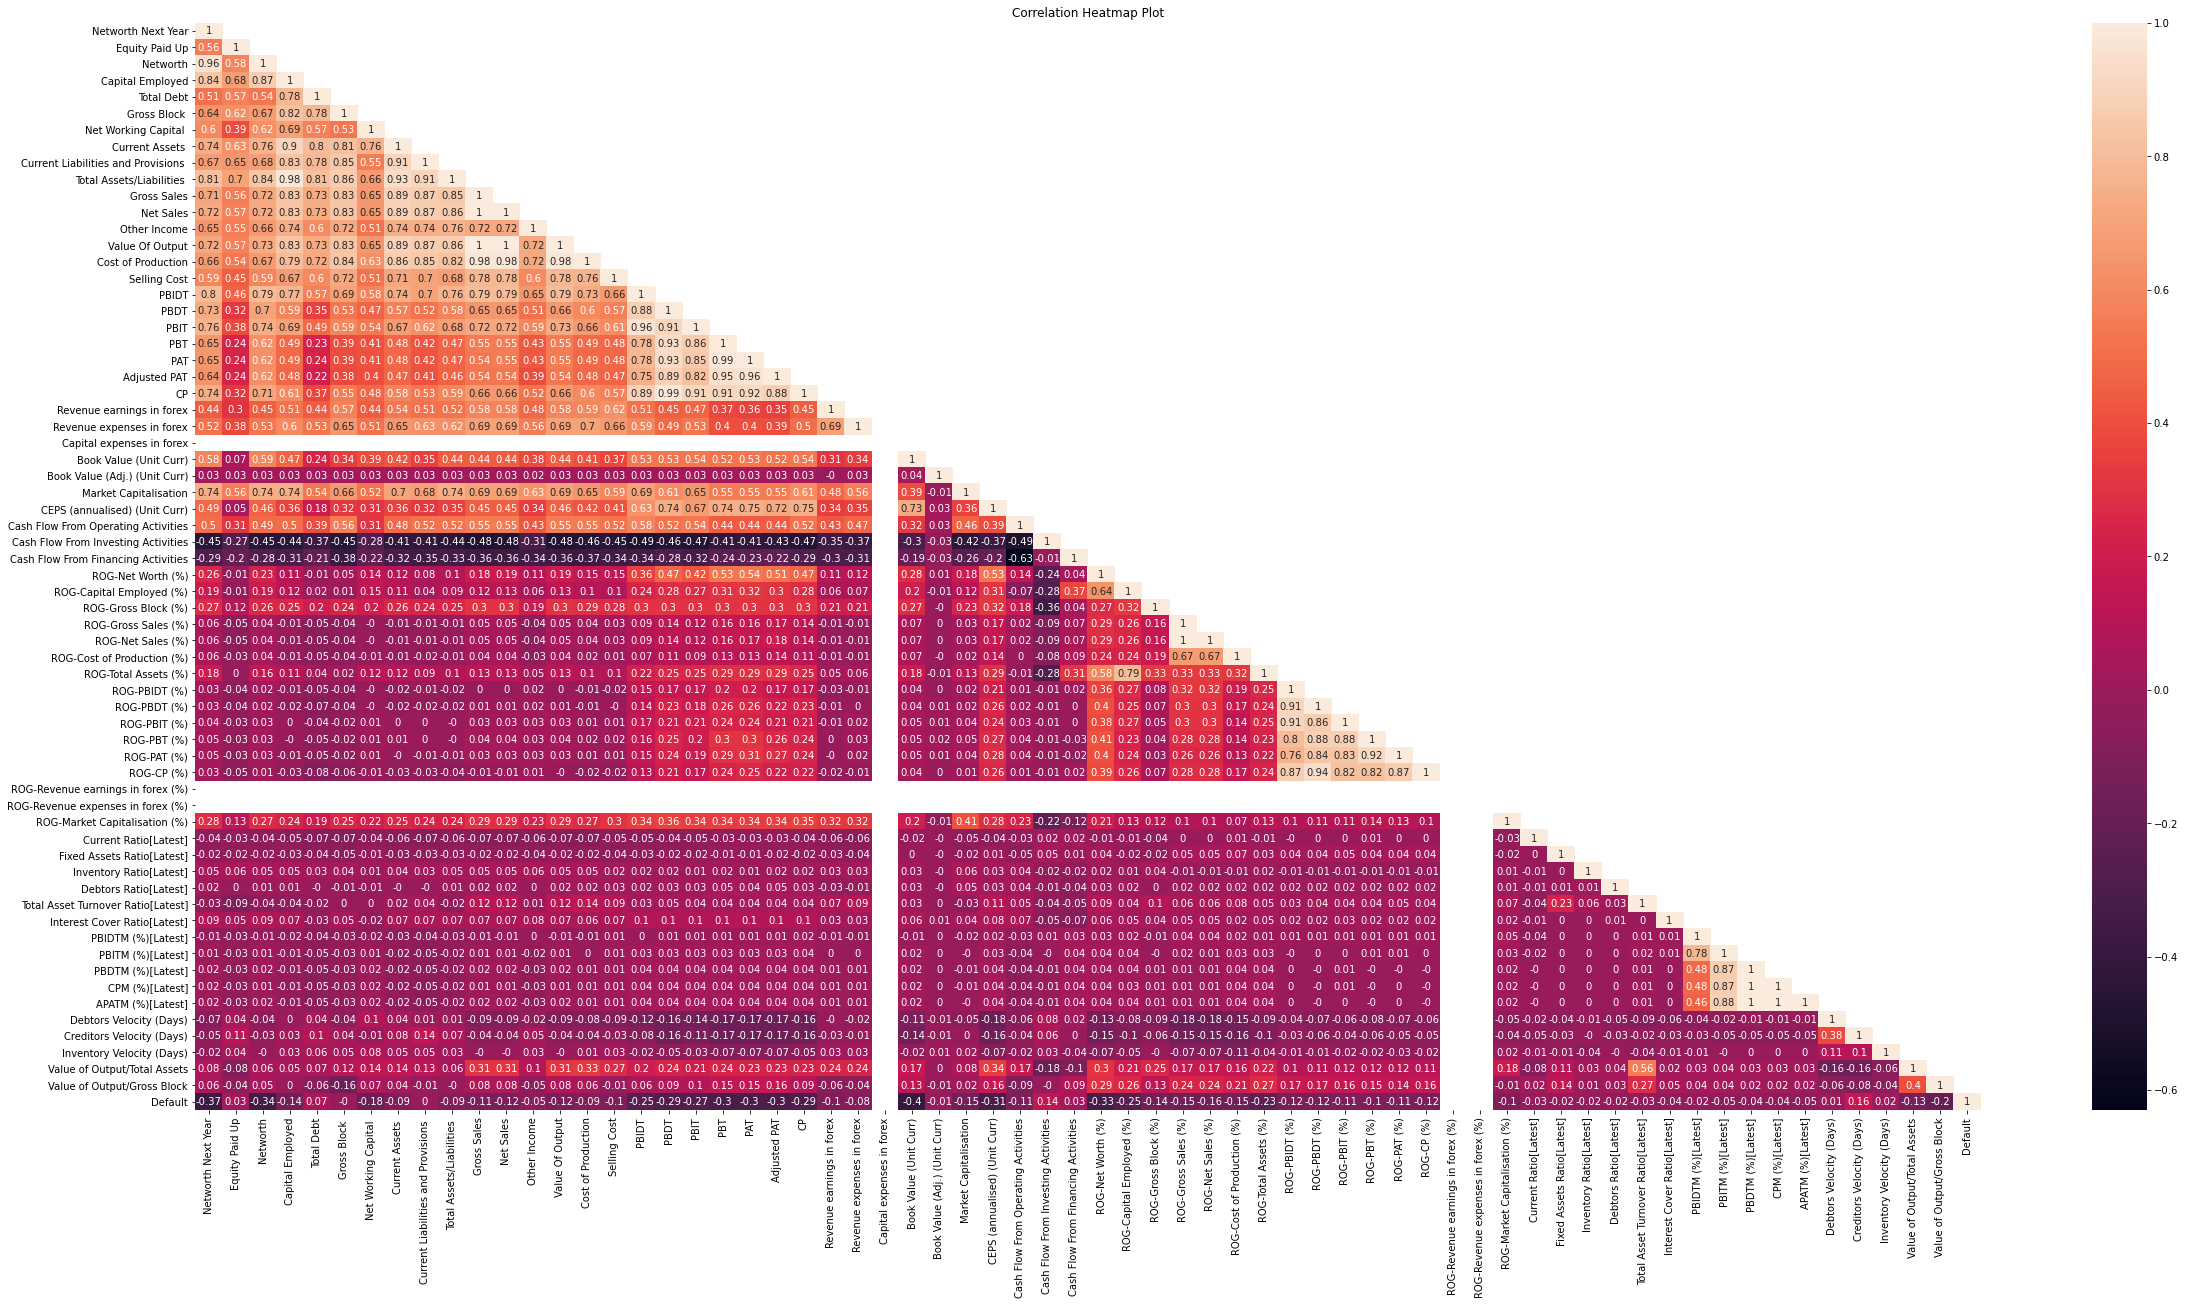

In [32]:
plt.figure(figsize=(40,20))
sns.heatmap(round(g,2), annot=True,mask=np.triu(g,+1));
plt.title('Correlation Heatmap Plot')
plt.show()

## 1.5 Train Test Split

In [33]:
X = data1_imputed.drop('Default', axis = 1)
y = data1_imputed['Default']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [36]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (2402, 65)
The training set for the dependent variable: (2402,)
The test set for the independent variables: (1184, 65)
The test set for the dependent variable: (1184,)


## 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

## &


## 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# Fit the Logistic Regression model
model_log = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [39]:
ytrain_predict_log = model_log.predict(X_train)
ytest_predict_log = model_log.predict(X_test)

In [40]:
ytest_predict_prob_log=model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,1.0,0.000000e+00
1,1.0,0.000000e+00
2,1.0,1.408042e-120
3,0.0,1.000000e+00
4,1.0,0.000000e+00


In [41]:
# Accuracy - Training Data
model_log.score(X_train, y_train)

1.0

In [42]:
# Accuracy - Testing Data
model_log.score(X_test, y_test)

0.9847972972972973

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [45]:
model_log = LogisticRegression(max_iter=10000,n_jobs=2)

In [46]:
grid_search_log = GridSearchCV(estimator = model_log, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [47]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [48]:
print(grid_search_log.best_params_,'\n')
print(grid_search_log.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none')


In [49]:
best_model_log = grid_search_log.best_estimator_

In [50]:
# Prediction on the training set

ytrain_predict_log = best_model_log.predict(X_train)
ytest_predict_log = best_model_log.predict(X_test)

In [51]:
## Getting the probabilities on the test set

ytest_predict_prob_log=best_model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,1.0,0.000000e+00
1,1.0,0.000000e+00
2,1.0,9.213858e-245
3,0.0,1.000000e+00
4,1.0,0.000000e+00


In [52]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2157
         1.0       1.00      1.00      1.00       245

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402
 



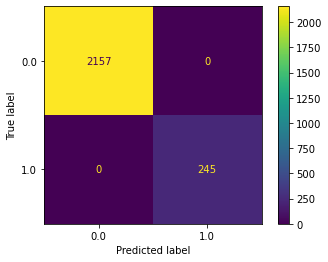

In [53]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_log,X_train,y_train)
print(classification_report(y_train, ytrain_predict_log),'\n');

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1041
         1.0       0.94      0.91      0.93       143

    accuracy                           0.98      1184
   macro avg       0.96      0.95      0.96      1184
weighted avg       0.98      0.98      0.98      1184
 



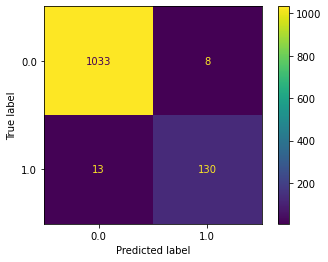

In [54]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_log,X_test,y_test)
print(classification_report(y_test, ytest_predict_log),'\n');

### Linear Discriminant Analysis

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
#Build LDA Model
clf_log = LinearDiscriminantAnalysis()
model_lda=clf_log.fit(X_train,y_train)

In [57]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = model_lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = model_lda.predict(X_test)

In [58]:
from sklearn import metrics

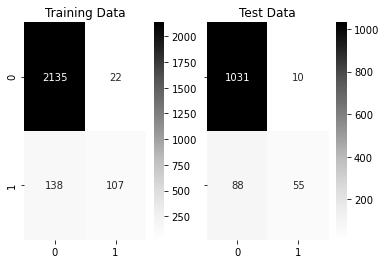

In [59]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [60]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.83      0.44      0.57       245

    accuracy                           0.93      2402
   macro avg       0.88      0.71      0.77      2402
weighted avg       0.93      0.93      0.92      2402
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1041
         1.0       0.85      0.38      0.53       143

    accuracy                           0.92      1184
   macro avg       0.88      0.69      0.74      1184
weighted avg       0.91      0.92      0.90      1184
 



### KNN Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train)
model_score_KNN = KNN_model.score(X_train, y_train)
print(model_score_KNN)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN))
print(metrics.classification_report(y_train, y_train_predict_KNN))

0.9350541215653622
[[2139   18]
 [ 138  107]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.86      0.44      0.58       245

    accuracy                           0.94      2402
   macro avg       0.90      0.71      0.77      2402
weighted avg       0.93      0.94      0.93      2402



In [63]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test)
model_score_KNN = KNN_model.score(X_test, y_test)
print(model_score_KNN)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print(metrics.classification_report(y_test, y_test_predict_KNN))

0.8902027027027027
[[1013   28]
 [ 102   41]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1041
         1.0       0.59      0.29      0.39       143

    accuracy                           0.89      1184
   macro avg       0.75      0.63      0.66      1184
weighted avg       0.87      0.89      0.87      1184



In [64]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.10810810810810811,
 0.10219594594594594,
 0.10979729729729726,
 0.09881756756756754,
 0.09375,
 0.09375,
 0.0971283783783784,
 0.09797297297297303,
 0.09797297297297303,
 0.1005067567567568]

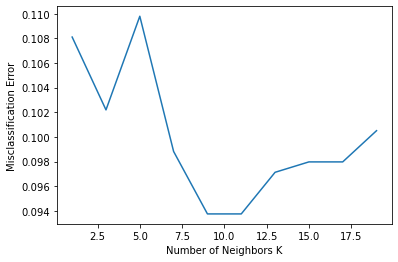

In [65]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train)
model_score_KNN = KNN_model.score(X_train, y_train)
print(model_score_KNN)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN))
print(metrics.classification_report(y_train, y_train_predict_KNN))

0.9350541215653622
[[2139   18]
 [ 138  107]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.86      0.44      0.58       245

    accuracy                           0.94      2402
   macro avg       0.90      0.71      0.77      2402
weighted avg       0.93      0.94      0.93      2402



In [68]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test)
model_score_KNN = KNN_model.score(X_test, y_test)
print(model_score_KNN)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print(metrics.classification_report(y_test, y_test_predict_KNN))

0.8902027027027027
[[1013   28]
 [ 102   41]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1041
         1.0       0.59      0.29      0.39       143

    accuracy                           0.89      1184
   macro avg       0.75      0.63      0.66      1184
weighted avg       0.87      0.89      0.87      1184

